# NASDAQ COMPANIES DOCUMENTS EDA

###  The dataset corresponds to SUBDIRECTORIES WITH PDFs documents that contain financial information about NASDAQ companies. Let's find out how big is our dataset.

In [2]:
import os

def get_folder_size(path='.'):
    """Returns the total size of the folder in gigabytes (GB)."""
    total = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for file in filenames:
            fp = os.path.join(dirpath, file)
            total += os.path.getsize(fp)
    return total / (1024 ** 3)  # Convert bytes to GB

def count_subdirectories(path='.'):
    """Returns the number of subdirectories in a folder."""
    count = 0
    for dirpath, dirnames, filenames in os.walk(path):
        count += len(dirnames)
    return count

def count_pdfs(path='.'):
    """Returns the total number of PDF files in a folder and its subdirectories."""
    count = 0
    for dirpath, dirnames, filenames in os.walk(path):
        for file in filenames:
            if file.endswith('.pdf'):
                count += 1
    return count

# Using the functions
dataset_path = 'dataset'
print(f"The size of the 'dataset' folder is: {get_folder_size(dataset_path):.2f} GB")
print(f"The 'dataset' folder has {count_subdirectories(dataset_path)} subdirectories")
print(f"The 'dataset' folder contains a total of {count_pdfs(dataset_path)} PDF files")



The size of the 'dataset' folder is: 29.80 GB
The 'dataset' folder has 2428 subdirectories
The 'dataset' folder contains a total of 9713 PDF files


### In a mini data set with some companies, we are going to find the most common words

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/martinlanabengut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/martinlanabengut/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.1 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


pdftotext version 4.04 [www.xpdfreader.com]
Copyright 1996-2022 Glyph & Cog, LLC
Syntax Warning: Bad annotation destination
Syntax Warning: Bad annotation destination
Syntax Warning: Bad annotation destination
Syntax Error (51906): Missing 'endstream'
Syntax Error (51922): Unknown operator 'endstream'
Syntax Error (51924): Unknown operator 'endobj'
Syntax Error (51936): Unknown operator 'obj'
Syntax Error (52044): Unknown operator 'endobj'
Syntax Error (52058): Unknown operator 'obj'
Syntax Error (52080): Unknown operator 'stream'
Syntax Error (685761): Missing 'endstream'
Syntax Error (685776): Unknown operator 'endstream'
Syntax Error (685778): Unknown operator 'endobj'
Syntax Error (685790): Unknown operator 'obj'
Syntax Error (685898): Unknown operator 'endobj'
Syntax Error (685912): Unknown operator 'obj'
Syntax Error (685934): Unknown operator 'stream'
Syntax Error: Leftover args in content stream
Syntax Error (723313): Missing 'endstream'
Syntax Error (723330): Unknown operator 

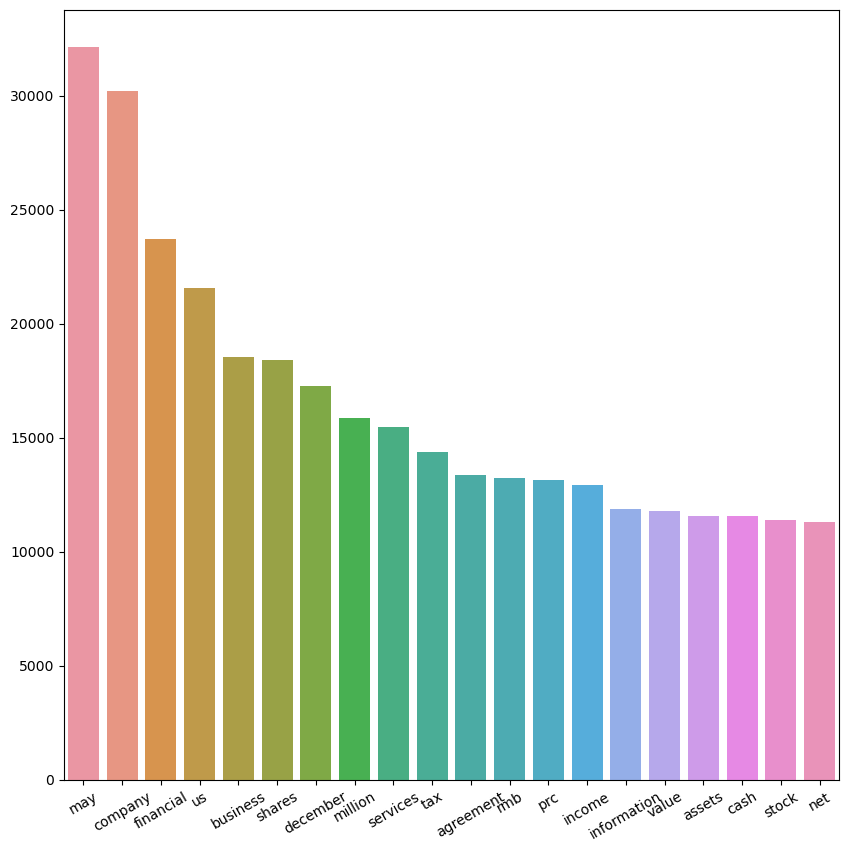

In [1]:
from plots import plot_most_common_words


plot_most_common_words("./mini-set")

The appearance of the word "may" probably refers to the modal verb rather than the month. Aside from that, the other words make sense considering that the documents correspond to anual financial statements.

### Also we can find the most common collection words

pdftotext version 4.04 [www.xpdfreader.com]
Copyright 1996-2022 Glyph & Cog, LLC
Syntax Warning: Bad annotation destination
Syntax Warning: Bad annotation destination
Syntax Warning: Bad annotation destination
Syntax Error (51906): Missing 'endstream'
Syntax Error (51922): Unknown operator 'endstream'
Syntax Error (51924): Unknown operator 'endobj'
Syntax Error (51936): Unknown operator 'obj'
Syntax Error (52044): Unknown operator 'endobj'
Syntax Error (52058): Unknown operator 'obj'
Syntax Error (52080): Unknown operator 'stream'
Syntax Error (685761): Missing 'endstream'
Syntax Error (685776): Unknown operator 'endstream'
Syntax Error (685778): Unknown operator 'endobj'
Syntax Error (685790): Unknown operator 'obj'
Syntax Error (685898): Unknown operator 'endobj'
Syntax Error (685912): Unknown operator 'obj'
Syntax Error (685934): Unknown operator 'stream'
Syntax Error: Leftover args in content stream
Syntax Error (723313): Missing 'endstream'
Syntax Error (723330): Unknown operator 

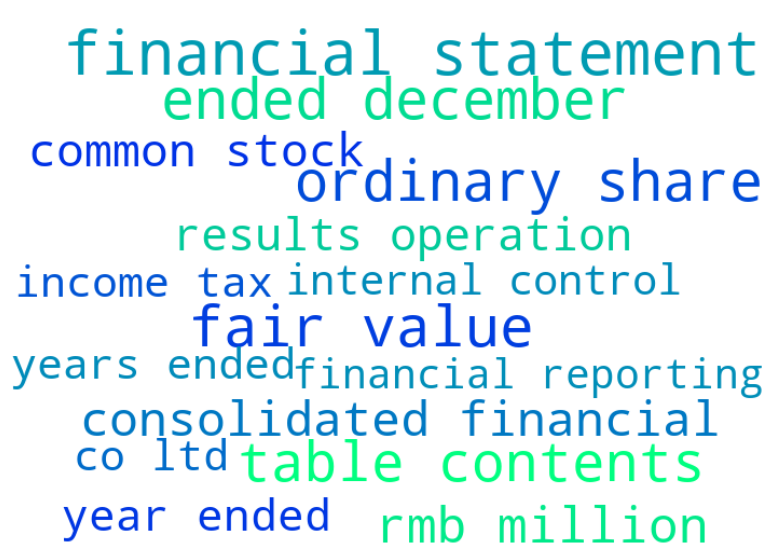

In [2]:
from eda.visualization import make_wordcloud
from text_normalizer import normalize_corpus, normalize_text
from haystack.utils import convert_files_to_docs


all_docs = convert_files_to_docs(dir_path="./mini-set", clean_func=normalize_text)

docs_text = [doc.content for doc in all_docs if len(doc.content) > 15]

stopword_removed = normalize_corpus(
    docs_text,
    contraction_expansion=False,
    accented_char_removal=False,
    text_lower_case=False,
    text_stemming=False,
    special_char_removal=False,
    remove_digits=False,
)

flattened_corpus = " ".join(stopword_removed)

make_wordcloud(flattened_corpus, collocations=True, stopwords=["united", "state"])

The most common collection worlds are "financial statement" (which is what the documents are all about), and "common stock" which is the type of stock that gives voting rights.

### we need to know the number of Symbols or tickers that are unique and not repeated in the dataset, in order to know how many companies actually make up the dataset.

In [26]:
import os
import re

def list_files_recursive(path):
    """Devuelve una lista de todos los archivos en un directorio y sus subdirectorios."""
    all_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            all_files.append(os.path.join(root, file))
    return all_files

# Obtener la lista de todos los archivos en la carpeta 'dataset/' y subcarpetas
files = list_files_recursive('dataset/')

# Conjunto para almacenar tickers únicos
unique_tickers = set()

for file in files:
    match = re.search(r"NASDAQ_([A-Z]+)_\d+.pdf", os.path.basename(file))
    if match:  # Verificar que la regex encontró un match
        unique_tickers.add(match.group(1))

# Convertir el conjunto a una lista
tickers = list(unique_tickers)

print(f"Number of unique tickers: {len(unique_tickers)} ")

#print(tickers)


Number of unique tickers: 2425 


### we have 2425 companies in the dataset

##### To get more information on the companies that are in our dataset, we are going to use an external csv downloaded from Kaggle(full_financial_stocks.csv).
##### This dataset contains financial data for the 4447 stocks traded on the Nasdaq. The data it contains has been minimally modified, which means that there are still several columns with a high percentage of null values. The purpose of having this "raw" dataset was so that developers could manipulate the data that has been retained in the same format in which it was retrieved when the dataset was created, thus providing a greater degree of customization.

Link: https://www.kaggle.com/datasets/gonzalezfrancisco/full-nasdaq-stocks-data?resource=download&select=full_financial_stocks_raw.csv

## First, we will check tickers that are in the dataset and in the full_financial_stocks.csv

In [27]:
import pandas as pd


# Leer el CSV
full_financial_df = pd.read_csv('full_financial_stocks.csv')

# find common tickets
common_tickers_in_full_financial = set(unique_tickers).intersection(set(full_financial_df['symbol']))

print(f"There are {len(common_tickers_in_full_financial)} tickers that are in the dataset and in the full_financial_stocks.csv.")
#print(common_tickers_in_full_financial)


There are 676 tickers that are in the dataset and in the full_financial_stocks.csv.


In [28]:
# of those 676 tickers that came out in 'common_tickers_in_full_financial', I need to know how many and which ones have some value in the column 'sector' of the csv full_financial_stocks.csv


# Filtrar el DataFrame basándose en los tickers comunes y luego comprobar si tienen un valor no nulo en la columna 'sector'
tickers_with_sector = full_financial_df[
    full_financial_df['symbol'].isin(common_tickers_in_full_financial) &
    full_financial_df['sector'].notna()
]['symbol'].unique()

print(f"There are {len(tickers_with_sector)} tickers that have some value in the column 'sector'.")
## print(tickers_with_sector)

There are 674 tickers that have some value in the column 'sector'.


## We are going to work and make some conclusions with these 674 tickers and the sectors

sector
Financial Services        288
Technology                 93
Industrials                74
Consumer Cyclical          65
Healthcare                 36
Consumer Defensive         29
Communication Services     28
Energy                     21
Real Estate                17
Basic Materials            15
Utilities                   8
Name: symbol, dtype: int64


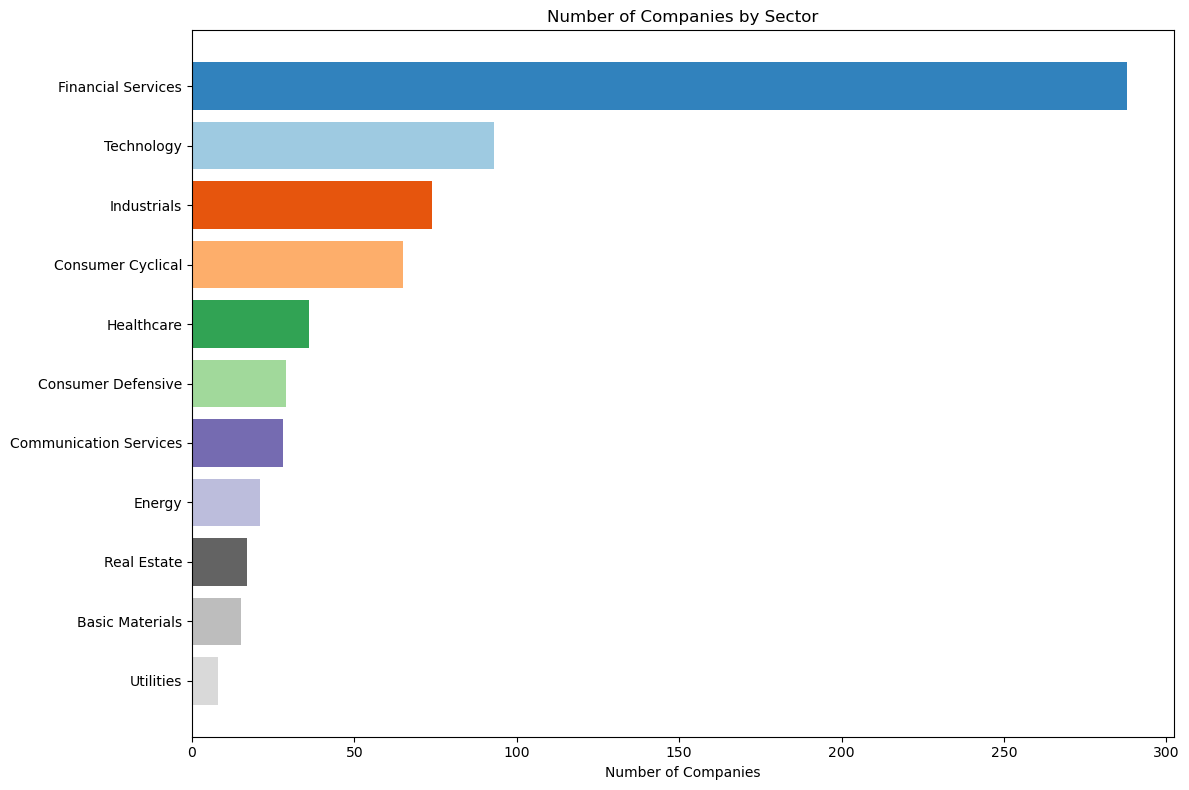

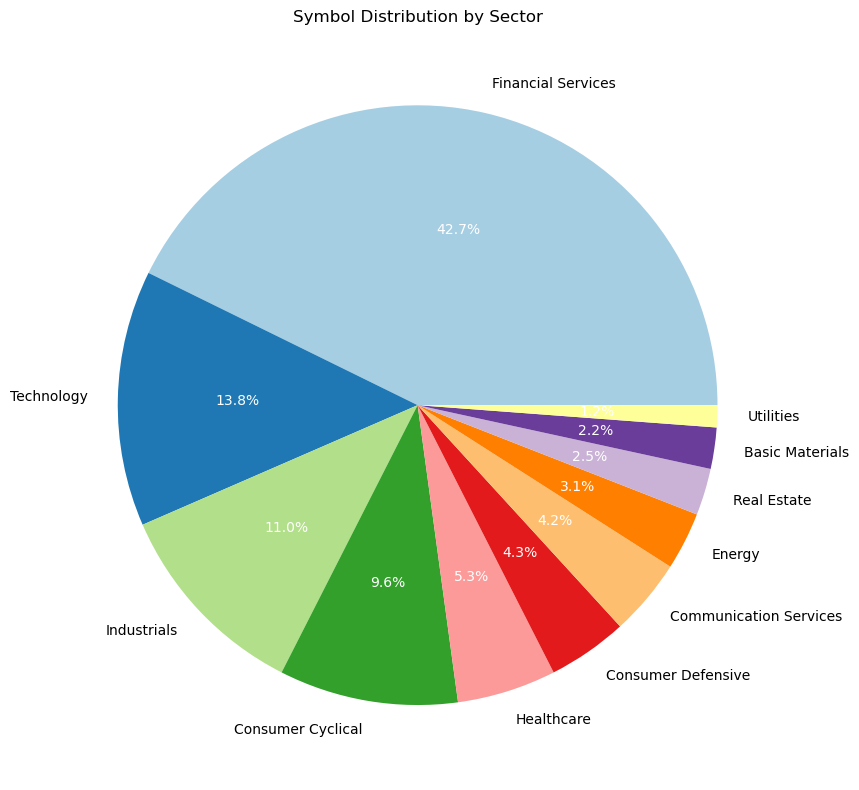

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the DataFrame to include only those tickers that have a value in tickers_with_sector
filtered_df = full_financial_df[full_financial_df['symbol'].isin(tickers_with_sector)]

# Group by sector and count the unique tickers
sector_counts = filtered_df.groupby('sector')['symbol'].nunique().sort_values(ascending=False)  # Sort values

# Print the count by sector
print(sector_counts)

# Colours
colors = plt.cm.tab20c(np.linspace(0, 1, len(sector_counts)))

# Horizontal Bar Chart
plt.figure(figsize=(12, 8))
plt.barh(sector_counts.index, sector_counts.values, color=colors)
plt.xlabel('Number of Companies')
plt.title('Number of Companies by Sector')
plt.gca().invert_yaxis()  # Invert the y-axis to make it more readable
plt.tight_layout()
plt.show()



# Plotting the pie chart for distribution by sector
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Paired(range(len(sector_counts)))  # Colors
wedges, texts, autotexts = ax.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', colors=colors)

# Set the style for the labels and percentages
for text, autotext in zip(texts, autotexts):
    text.set(size=10, color="black")
    autotext.set(size=10, color="white")

# Display the pie chart
plt.title("Symbol Distribution by Sector")
plt.tight_layout()
plt.show()


## Conclusion:

Our dataset is primarily dominated by companies from the Financial Services sector, which accounts for a significant 42.7% of the total. This is indicative of the predominance of the finance industry in our dataset. The Technology sector, which includes various tech firms and startups, follows at 13.8%. Industrials make up the third largest portion at 11%.

Beyond these, sectors like Consumer Cyclical and Healthcare claim 9.6% and 5.3% respectively. The representation then gradually tapers for the remaining sectors, all of which hold less than 5% of the total share, with the Utilities sector at the tail end, accounting for just 1.2%.

The distribution underscores a considerable skew towards financial and technological companies in the dataset, with other sectors being relatively less represented.

# Now, let's analyze the industries to which these companies belong. But first... What is the difference between sector and industry?

Sector: A broad categorization of the economy based on primary business activities, such as Technology or Healthcare.

Industry: A more specific grouping within a sector, detailing the finer nuances of business operations. For example, within the Technology sector, there can be industries like Software, Hardware, and Semiconductors.

## First let's look at how many industries there are:

In [30]:
# Obtener industrias únicas del conjunto filtrado
unique_industries = filtered_df['industry'].dropna().unique()

# Imprimir la cantidad
print(f"There are {len(unique_industries)} industries in the dataset.")

There are 109 industries in the dataset.


### We note that there are 109 different industries in our dataset.

### Taking a look to the most importants in our dataset

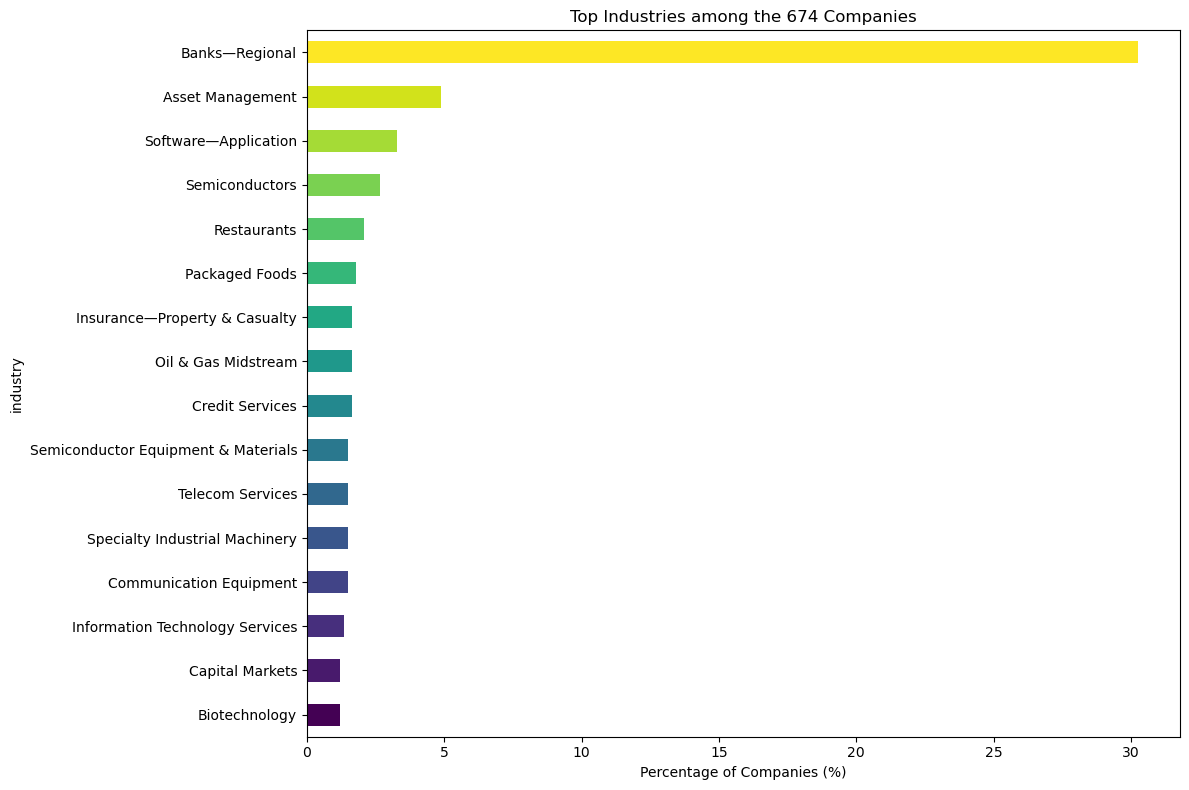

In [31]:
import matplotlib.pyplot as plt

# Assuming filtered_df is the dataframe containing the 674 tickers
industry_counts = filtered_df['industry'].value_counts()
total_companies = len(filtered_df)

industry_percentages = (industry_counts / total_companies) * 100

# Filter out industries with a percentage greater than a certain threshold (e.g., 1%).
filtered_industries = industry_percentages[industry_percentages > 1]

# Sort values for better visualization
sorted_industries = filtered_industries.sort_values()

# Plot
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_industries)))  # Using viridis colormap for a change
sorted_industries.plot(kind='barh', color=colors)
plt.xlabel('Percentage of Companies (%)')
plt.title('Top Industries among the 674 Companies')
plt.tight_layout()
plt.show()


## Conclusion:

Out of the 674 NASDAQ companies analyzed, they spread across 109 distinct industries. The most prominent industry is "Banks—Regional" with a staggering representation of 30.27%. It's followed by sectors such as "Asset Management" (4.90%) and "Software—Application" (3.26%). In total, 16 industries have a representation greater than 1%, highlighting the diversity and breadth of NASDAQ-listed entities.

It's important to note the significant weightage of the regional banking sector in this dataset.